In [1]:
%matplotlib inline
#%pylab
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mpc
import matplotlib.dates as dts
import numpy as np
import pandas as pd
import itertools
import os
#import ROOT
import datetime
#from root_numpy import root2array, root2rec, tree2rec, array2root
from scipy.optimize import curve_fit
#from scipy.misc import factorial


In [2]:
plt.rcParams.update({'font.size': 16})

In [3]:
from decode_new import GetWaveformsNoiseRemoval
from decode_new import GetWaveforms

In [4]:
from datetime import datetime

In [5]:
def gettime(name):
    date = name.split('PrM1-')[-1].split('.dat')[0]
    time = datetime.strptime(date,'%Y_%m_%d-%H_%M_%S')
    return time

In [6]:
def QaQc(wf_v):
    anode_v = wf_v[0][700:]
    cathode_v = wf_v[1][500:]
    Qa = np.amax(anode_v)
    Qc = np.amin(cathode_v)
    return Qa,Qc

def QaQcSTATS(ev_wf_v):
    
    Qa_v = []
    Qc_v = []
    for wf_v in ev_wf_v:
        Qa,Qc = QaQc(wf_v)
        Qa_v.append(Qa*1e3)
        Qc_v.append(Qc*1e3)
    Qa_v = np.array(Qa_v)
    Qc_v = np.array(Qc_v)

    Qa_avg = np.mean(Qa_v)
    Qa_rms = np.std(Qa_v)
    Qc_avg = np.mean(Qc_v)
    Qc_rms = np.std(Qc_v)
    
    return [[Qa_avg,Qa_rms],[Qc_avg,Qc_rms]]

# Set path to files

In [7]:
PATH = '/Users/dcaratelli/data/LArCADe/Run4/'

subdir_v = os.listdir(PATH)
dt = 0.0005

In [8]:
VOLTAGEMAP = {}

datafile_v = []

for subdir in subdir_v:
    #print(subdir)
    fulldir = PATH + subdir + '/'
    voltage = int(subdir.split('VA')[-1])
    #print(voltage)
    datafiles = os.listdir(fulldir)
    for datafile in datafiles:
        #print(datafile)
        if (datafile.find('.dat') >= 0):
            VOLTAGEMAP[fulldir+datafile] = voltage
            datafile_v.append(fulldir+datafile)

In [9]:
def getDataFile(time):
    found = False
    for i,datafile in enumerate(datafile_v):
        if (datafile.find(time) >= 0):
            return i
    return None

# List all available files

In [10]:
for i,datafile in enumerate(datafile_v):
    print ('%i -> %s'%(i,datafile))

0 -> /Users/dcaratelli/data/LArCADe/Run4/VA75/PrM1-2024_08_20-13_25_29.dat
1 -> /Users/dcaratelli/data/LArCADe/Run4/VA75/PrM1-2024_08_20-13_25_20.dat
2 -> /Users/dcaratelli/data/LArCADe/Run4/VA4000/PrM1-2024_08_20-12_21_10.dat
3 -> /Users/dcaratelli/data/LArCADe/Run4/VA4000/PrM1-2024_08_20-12_21_41.dat
4 -> /Users/dcaratelli/data/LArCADe/Run4/VA6500/PrM1-2024_08_20-12_26_57.dat
5 -> /Users/dcaratelli/data/LArCADe/Run4/VA6500/PrM1-2024_08_20-12_26_48.dat
6 -> /Users/dcaratelli/data/LArCADe/Run4/VA225/PrM1-2024_08_20-13_11_23.dat
7 -> /Users/dcaratelli/data/LArCADe/Run4/VA225/PrM1-2024_08_20-13_11_32.dat
8 -> /Users/dcaratelli/data/LArCADe/Run4/VA2500/PrM1-2024_08_20-12_17_36.dat
9 -> /Users/dcaratelli/data/LArCADe/Run4/VA2500/PrM1-2024_08_20-12_17_27.dat
10 -> /Users/dcaratelli/data/LArCADe/Run4/VA2500/PrM1-2024_08_20-12_17_18.dat
11 -> /Users/dcaratelli/data/LArCADe/Run4/VA1000/PrM1-2024_08_20-12_09_52.dat
12 -> /Users/dcaratelli/data/LArCADe/Run4/VA1000/PrM1-2024_08_20-12_10_01.dat
13

# Example plotting average waveform

In [44]:
time = '12_10_01'
filepathname = ''
nfile = getDataFile(time)
if (nfile != None):
    datafile = datafile_v[nfile]
    filepathname = datafile
    print (datafile)
    #ev_wf_v = GetWaveformsNoiseRemoval(datafile,verbose=True)
    ev_wf_v = GetWaveforms(datafile)
else:
    print ('no input file found!')
    
#print (len(ev_wf_v))
#print(ev_wf_v)

/Users/dcaratelli/data/LArCADe/Run4/VA1000/PrM1-2024_08_20-12_10_01.dat
dt is  0.00019999999999999998


In [45]:
time_v = np.linspace(0,dt*len(ev_wf_v[0][0]),len(ev_wf_v[0][0]))

In [46]:
avg_A_wf_v = np.zeros(len(time_v))
avg_C_wf_v = np.zeros(len(time_v))
for n in range(len(ev_wf_v)):
    avg_A_wf_v += ev_wf_v[n][0]
    avg_C_wf_v += ev_wf_v[n][1]
avg_A_wf_v /= len(ev_wf_v)
avg_C_wf_v /= len(ev_wf_v)

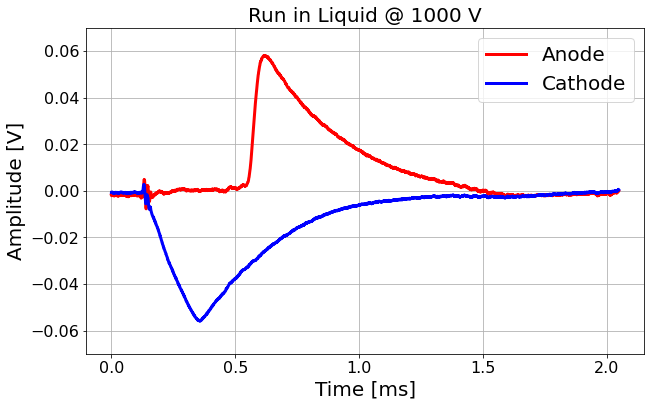

In [47]:
fig = plt.figure(figsize=(10,6))
plt.plot(time_v,avg_A_wf_v,color='r',label='Anode',lw=3)
plt.plot(time_v,avg_C_wf_v,color='b',label='Cathode',lw=3)
plt.grid()
plt.legend(fontsize=20)
plt.xlabel('Time [ms]',fontsize=20)
plt.ylabel('Amplitude [V]',fontsize=20)
plt.title('Run in Liquid @ %i V'%VOLTAGEMAP[filepathname],fontsize=20)
plt.ylim([-0.07,0.07])
#plt.xlim([0.1,1.3])

plt.show()

# Waveform by waveform Plotting

In [ ]:
# time-step
dt = 0.0005

# where to compute baseline
BaselineRange1 = [0.10,0.15]
BaselineRange2 = [0.18,0.20]

# where to integrate charge
IntegrationRange = [0.2,0.6]

B1Tmin = int(BaselineRange1[0]/dt)
B1Tmax = int(BaselineRange1[1]/dt)

B2Tmin = int(BaselineRange2[0]/dt)
B2Tmax = int(BaselineRange2[1]/dt)

IntMin = int(IntegrationRange[0]/dt)
IntMax = int(IntegrationRange[1]/dt)

# below, one entry per Run
# average waveforms for anode and cathode
ALL_AVG_C_WF_V = []
ALL_AVG_A_WF_V = []
# max/min amplitude at anode and cathode
AVG_A_MAX_V = []
AVG_C_MIN_V = []
# voltage
VOLTAGE_V = []

#fig = plt.figure(figsize=(8,6))

for date,voltage in VOLTAGEMAP.iteritems():
    
    VOLTAGE_V.append(voltage)
    
    nfile = getDataFile(date)
    if (nfile != None):
        datafile = PATH + datafile_v[nfile]
        print datafile
        ev_wf_v = GetWaveformsNoiseRemoval(datafile)
        #ev_wf_v = GetWaveforms(datafile)
    else:
        print 'no input file found!'
        
    time_v = np.linspace(0,dt*len(ev_wf_v[0][0]),len(ev_wf_v[0][0]))
    
    avg_A_wf_v = np.zeros(len(time_v))
    avg_C_wf_v = np.zeros(len(time_v))
    #for n in xrange(len(ev_wf_v)):
    #    avg_A_wf_v += ev_wf_v[n][0]
    #    avg_C_wf_v += ev_wf_v[n][1]
    #avg_A_wf_v /= len(ev_wf_v)
    #avg_C_wf_v /= len(ev_wf_v)
    
    
    ANODE_MAX_V = []
    CATHODE_MAX_V = []
    
    # used waveforms
    NWFS = 0
    
    for n in xrange(len(ev_wf_v)):
        
        cathode_wf = 1e3 * ev_wf_v[n][1]
        anode_wf   = 1e3 * ev_wf_v[n][0]
        
        # compute baselines
        B1C = np.mean(cathode_wf[B1Tmin:B1Tmax])
        B2C = np.mean(cathode_wf[B2Tmin:B2Tmax])
        B1A = np.mean(anode_wf[B1Tmin:B1Tmax])
        B2A = np.mean(anode_wf[B2Tmin:B2Tmax])
        #print (r'baseline C1 : %.02f C2 : %.02f A1 : %.02f A2 : %.02f [$\mu$ V]'%(B1C,B2C,B1A,B2A))
        
        BC = 0.5*(B1C+B2C)
        BA = 0.5*(B1A+B2A)
        
        cathode_wf -= BC
        anode_wf   -= BA
        
        AMAX = np.max(anode_wf)
        ANODE_MAX_V.append(AMAX)
        
        CMAX = np.max(cathode_wf)
        CATHODE_MAX_V.append(CMAX)
        
        # skip noise
        if (AMAX > 50): continue
        
        # save avg wf
        avg_A_wf_v += anode_wf
        avg_C_wf_v += cathode_wf
        NWFS += 1
        
        '''
        fig = plt.figure(figsize=(10,6))
        plt.plot(time_v,anode_wf,color='r',label='Anode',lw=1,alpha=0.5)
        plt.plot(time_v,cathode_wf,color='b',label='Cathode',lw=1,alpha=0.5)
        plt.grid()
        #plt.legend(fontsize=20)
        plt.xlabel('Time [ms]',fontsize=20)
        plt.ylabel('Amplitude [mV]',fontsize=20)
        plt.title('Run in Liquid @ %i V'%voltage,fontsize=20)
        plt.xlim([0,0.75])
        plt.ylim([-100,100])
        plt.show()
        '''
        
        #if (n > 50):
        #    break
       
    avg_A_wf_v /= NWFS
    avg_C_wf_v /= NWFS
    
    ALL_AVG_C_WF_V.append(avg_C_wf_v)
    ALL_AVG_A_WF_V.append(avg_A_wf_v)
    #TIME_V.append
    
    AVG_A_MAX_V.append(np.max(avg_A_wf_v))
    AVG_C_MIN_V.append(np.min(avg_C_wf_v))
    
    fig = plt.figure(figsize=(10,6))
    plt.plot(time_v,avg_A_wf_v,color='r',label='Anode',lw=3,alpha=1)
    plt.plot(time_v,avg_C_wf_v,color='b',label='Cathode',lw=3,alpha=1)
    plt.grid()
    plt.legend(fontsize=20)
    plt.xlabel('Time [ms]',fontsize=20)
    plt.ylabel('Amplitude [mV]',fontsize=20)
    plt.title('Run in Liquid @ %i V'%voltage,fontsize=20)
    plt.savefig('/home/david/Neutrinos/LArCADe/Analysis/2021/avg_%iv.pdf'%voltage,dpi=250)
    plt.xlim([0,0.65])
    plt.ylim([-80,30])
    plt.show()
    
    #plt.hist(ANODE_MAX_V,bins=np.linspace(0,100,100),histtype='step',lw=2,label='%i V'%voltage)
    #plt.hist(CATHODE_MAX_V,bins=np.linspace(0,100,100),histtype='step',lw=2,label='%i V'%voltage)
#plt.title('voltage : %i'%voltage)
#plt.xlabel('max anode amplitude [mV]')
#plt.legend(loc=1,fontsize=10)
#plt.show()
        
#break

In [ ]:
COLORMAP = {}
COLORMAP[6000] = 'k'
COLORMAP[5000] = 'b'
COLORMAP[4000] = 'r'
COLORMAP[3000] = 'orange'
COLORMAP[2000] = 'c'
COLORMAP[1000] = 'gray'
COLORMAP[900] = 'yellow'
COLORMAP[800] = 'green'
COLORMAP[700] = 'coral'
COLORMAP[600] = 'olive'
COLORMAP[500] = 'salmon'

In [ ]:
AMPL_RATIO_V = -np.array(AVG_A_MAX_V)/np.array(AVG_C_MIN_V)

fig = plt.figure(figsize=(8,6))
plt.plot(VOLTAGE_V,AMPL_RATIO_V,'ro')
plt.xlabel('anode voltage [V]')
plt.ylabel('Charge Amplitude Ratio')
plt.xlim([0,3100])
plt.ylim([0,0.16])
plt.savefig('/home/david/Neutrinos/LArCADe/Analysis/2021/charge_ampl_ratio_zoom.pdf',dpi=250)
plt.show()

In [ ]:
USEDMAP = {}

fig = plt.figure(figsize=(10,6))
for i,voltage in enumerate(VOLTAGE_V):
    if (voltage >= 1000): continue
    if (voltage in USEDMAP.keys()):
        plt.plot(time_v,ALL_AVG_A_WF_V[i],lw=2,alpha=0.5,color=COLORMAP[voltage])
    else:
        plt.plot(time_v,ALL_AVG_A_WF_V[i],lw=2,alpha=0.5,color=COLORMAP[voltage],label='%i V'%voltage)
    USEDMAP[voltage] = 1
plt.grid()
plt.legend(fontsize=14)
plt.xlabel('Time [ms]',fontsize=20)
plt.ylabel('Amplitude [mV]',fontsize=20)
plt.title('All anode waveforms',fontsize=20)
plt.xlim([0.2,0.65])
plt.ylim([-5,5])
#plt.ylim([-80,10])
plt.show()

# Timing analysis 

In [ ]:
def diffwf(wf):
    wfdiff = np.zeros(len(wf))
    for n in range(2,len(wf)-3):
        wfdiff[n] = (wf[n+2] - wf[n-2])/5.
    return wfdiff

In [ ]:
USEDMAP = {}

voltage_v = []
slope_v = []
AGcrossing_v = []
Acrossing_v = []
CGcrossing_v = []
Ccrossing_v = []

# dictionaries storing output as arrays. Key for dictionary is the voltage, and each entry is a vector
# (one per run)
tmax_by_voltage = {}
AG_A_drift_by_voltage = {}
C_CG_drift_by_voltage = {}
CG_AG_drift_by_voltage = {}

ctr = 0
wfctr = 0

print('getting started...')

for i,voltage in enumerate(VOLTAGE_V):
    
    print('iteratio %i with voltage %i'%(i,voltage))
    
    USEDMAP[voltage] = 1
    
    waveformA = ALL_AVG_A_WF_V[i]
    waveformC = ALL_AVG_C_WF_V[i]
    
        
    mincathode = np.min(waveformC)
    waveformAR = waveformA#/(-mincathode)
    waveformAR = diffwf(waveformAR)
    waveformCR = diffwf(waveformC)
        
    # find C and CG crossings
    CGcrossing = 0
    Ccrossing = 0
    for tick in range(len(waveformCR)-1):
        if (tick < 220):
            continue
        ADC1 = waveformCR[tick]
        ADC2 = waveformCR[tick+1]
        if (Ccrossing == 0):
            if (ADC1 < -0.3 and ADC2 < -0.3):
                Ccrossing = tick
        elif (Ccrossing > 0 and CGcrossing == 0):
            if (ADC1 > -0.3 and ADC2 > -0.3):
                CGcrossing = tick
        else:
            break
                
    CGcrossing_v.append(CGcrossing)
    Ccrossing_v.append(Ccrossing)
    CCGtdrift = (CGcrossing - Ccrossing) * 0.5 # us

        
    if voltage in C_CG_drift_by_voltage.keys():
        C_CG_drift_by_voltage[voltage].append(CCGtdrift)
    else:
        C_CG_drift_by_voltage[voltage] = [CCGtdrift]


    
    # find AG and A crossings
    AGcrossing = 0
    Acrossing = 0
    
    for tick in range(len(waveformAR)-1):
        if (tick < CGcrossing):
            continue
        ADC1 = waveformAR[tick]
        ADC2 = waveformAR[tick+1]
        if (AGcrossing == 0):
            if (ADC1 > 0.2 and ADC2 > 0.2):
                AGcrossing = tick
        elif (AGcrossing > 0 and Acrossing == 0):
            if (ADC1 < 0.2 and ADC2 < 0.2):
                Acrossing = tick
        else:
            break
                
    AGcrossing_v.append(AGcrossing)
    Acrossing_v.append(Acrossing)
    AGAtdrift = (Acrossing - AGcrossing) * 0.5 # us
        
    if voltage in AG_A_drift_by_voltage.keys():
        AG_A_drift_by_voltage[voltage].append(AGAtdrift)
    else:
        AG_A_drift_by_voltage[voltage] = [AGAtdrift]

    # CG -> AG times   
    CGAGtdrift = (AGcrossing - CGcrossing) * 0.5
    if voltage in CG_AG_drift_by_voltage.keys():
        CG_AG_drift_by_voltage[voltage].append(CGAGtdrift)
    else:
        CG_AG_drift_by_voltage[voltage] = [CGAGtdrift]
        
    voltage_v.append(voltage)
        #slope_v.append(slope)
        
    print ('here voltage is ',voltage)
        
            
    
    # find peak tick of anode waveform
    tickmax = np.argmax(waveformAR)
    Tm = 350
    TM = 800

    fig = plt.figure(figsize=(12,6))
    plt.plot(waveformA[Tm:TM],color='k',marker='.')#,label='Cathode',alpha=0.5)
    plt.plot(waveformC[Tm:TM],color='r',marker='.')#,label='%i Volts'%voltage)#,label='Cathode',alpha=0.5)
    plt.axvline(Acrossing-Tm,linestyle='-.',color='k',label='anode crossing')
    plt.axvline(Ccrossing-Tm,linestyle='--',color='r',label='catode crossing')
    plt.axvline(AGcrossing-Tm,linestyle='--',color='k',label='anode grid crossing')
    plt.axvline(CGcrossing-Tm,linestyle='-.',color='r',label='cathode grid crossing')
    plt.grid()
    plt.legend()
    plt.xlim([0,TM-Tm])
    plt.xlabel('time-ticks [TDC]')
    plt.title('Waveforms @ voltage %i V'%voltage)
    plt.show()
    
    fig = plt.figure(figsize=(12,6))
    plt.plot(waveformAR[Tm:TM],color='k',marker='.')#,label='Cathode',alpha=0.5)
    plt.plot(waveformCR[Tm:TM],color='r',marker='.')#,label='%i Volts'%voltage)#,label='Cathode',alpha=0.5)
    plt.axvline(Acrossing-Tm,linestyle='-.',color='k',label='anode crossing')
    plt.axvline(Ccrossing-Tm,linestyle='--',color='r',label='catode crossing')
    plt.axvline(AGcrossing-Tm,linestyle='--',color='k',label='anode grid crossing')
    plt.axvline(CGcrossing-Tm,linestyle='-.',color='r',label='cathode grid crossing')
    plt.grid()
    plt.legend()
    plt.ylim([-1.5,1.5])
    plt.xlim([0,TM-Tm])
    plt.xlabel('time-ticks [TDC]')
    plt.title('Waveform Diffs @ voltage %i V'%voltage)
    plt.show()
    
    ctr += 1


# Timing results

In [ ]:
from scipy import interpolate

FIELD_V = [0.1,0.2,0.3,0.5,1.0,2.0,3.0,5.0,10.,20]
VEL_V = [0.0533,0.0922,0.1206,0.1601,0.2175,0.2797,0.320,0.3773,0.4710,0.5865]


fig = plt.figure(figsize=(6,6))
field_v = np.array([2,3,3.5,4,5,6])
dist = 1.7 # cm
VperCM = field_v/dist
print field_v/dist
drift_v = [0.2405,0.2794,0.2946,0.3081,0.3315,0.3514]
#plt.plot(VperCM,drift_v,'bo--')
plt.plot(FIELD_V,VEL_V,'bo--')

#func = interpolate.interp1d(VperCM,drift_v)
#xvals = np.arange(VperCM[0],VperCM[-1],0.1)
func2 = interpolate.interp1d(FIELD_V,VEL_V)
xvals = np.arange(FIELD_V[0],FIELD_V[-1],0.01)
yvals = func2(xvals)
plt.plot(xvals,yvals,'r--')

plt.grid()
plt.ylabel('E-field [kV/cm]')
plt.xlabel(r'drift velocity [cm / $\mu$s]')
plt.title('data from https://lar.bnl.gov/properties',fontsize=14)
plt.show()

In [ ]:
#fig = plt.figure(figsize=(6,6))
#plt.plot(voltage_v,slope_v,'ko')
#plt.xlabel('voltage [V]')
#plt.ylabel('Waveform Rise Slope [A.U.]')
#plt.show()

DIST_AG_A = 0.85
DIST_C_CG = 1.7
DIST_CG_AG = 0.85*3

fig = plt.figure(figsize=(6,6))
plt.plot(voltage_v,Ccrossing_v,'ko')
plt.xlabel('voltage [V]')
plt.ylabel('Cathode crossing tick')
plt.ylim([400,500])
plt.show()
fig = plt.figure(figsize=(6,6))
plt.plot(voltage_v,CGcrossing_v,'ko')
plt.xlabel('voltage [V]')
plt.ylabel('Cathode Grid crossing tick')
plt.ylim([400,500])
plt.show()
fig = plt.figure(figsize=(6,6))
plt.plot(voltage_v,AGcrossing_v,'ko')
plt.xlabel('voltage [V]')
plt.ylabel('Anode Grid crossing tick')
plt.xlim([1500,6500])
plt.ylim([500,600])
plt.show()
fig = plt.figure(figsize=(6,6))
plt.plot(voltage_v,Acrossing_v,'ko')
plt.xlabel('voltage [V]')
plt.ylabel('Anode crossing tick')
plt.xlim([1500,6500])
plt.ylim([500,600])
plt.show()

AGcrossing_v = np.array(AGcrossing_v)
Acrossing_v = np.array(Acrossing_v)
TDriftA = (Acrossing_v - AGcrossing_v) #* 0.5

fig = plt.figure(figsize=(6,6))
ctr = 0
efield_v = []
efield_raw_v = []
for key,vals in AG_A_drift_by_voltage.items():
    efield_v.append(key/1000./(DIST_AG_A/2.))
    efield_raw_v.append(key)
    #print (' there are %i measurement for voltage %i'%(len(v),key))
    #print (v)
    for v in vals:
        plt.plot(key,v,'o',color=COLORMAP[key],lw=2)
driftvel_v = func2(efield_v)
efield_v = np.array(efield_v) * 1000.
drifttime_v_AG_A = DIST_AG_A / driftvel_v 
#plt.plot(efield_raw_v,drifttime_v_AG_A,'k^',label='expectation')
#plt.plot(efield_v,drifttime_v_AG_A,'ko',label='8 mm AG -> A dist')
plt.xlabel('voltage [V]')
plt.ylabel('AG -> A drift time [us]')
plt.xlim([1500,6500])
plt.ylim([0,10])
#plt.legend()
plt.show()


fig = plt.figure(figsize=(6,6))
ctr = 0
for key,vals in C_CG_drift_by_voltage.items():
    for v in vals:
        plt.plot(key,v,'o',color=COLORMAP[key],lw=2)
#plt.plot(voltage_v,TDriftA,'ko')
plt.xlabel('voltage [V]')
plt.ylabel('C -> CG drift time [us]')
plt.xlim([1500,6500])
plt.ylim([20,30])
plt.show()

fig = plt.figure(figsize=(6,6))
ctr = 0
for key,vals in CG_AG_drift_by_voltage.items():
    for v in vals:
        plt.plot(key,v,'o',color=COLORMAP[key],lw=2)
#plt.plot(voltage_v,TDriftA,'ko')
plt.xlabel('voltage [V]')
plt.ylabel('CG -> AG drift time [us]')
plt.xlim([1500,6500])
plt.ylim([0,60])
plt.show()

In [ ]:
from scipy import interpolate

FIELD_V = [0.01,0.05,0.1,0.2,0.3,0.5,1.0,2.0,3.0,5.0,10.,20]
VEL_V = [0.0057,0.0282,0.0533,0.0922,0.1206,0.1601,0.2175,0.2797,0.320,0.3773,0.4710,0.5865]


fig = plt.figure(figsize=(6,6))
field_v = np.array([2,3,3.5,4,5,6])
dist = 1.7 # cm
VperCM = field_v/dist
print field_v/dist
drift_v = [0.2405,0.2794,0.2946,0.3081,0.3315,0.3514]
#plt.plot(VperCM,drift_v,'bo--')
plt.plot(VEL_V,FIELD_V,'bo--')

#func = interpolate.interp1d(VperCM,drift_v)
#xvals = np.arange(VperCM[0],VperCM[-1],0.1)
func = interpolate.interp1d(VEL_V,FIELD_V)
xvals = np.arange(VEL_V[0],VEL_V[-1],0.01)
yvals = func(xvals)
plt.plot(xvals,yvals,'r--')

plt.grid()
plt.ylabel('E-field [kV/cm]')
plt.xlabel(r'drift velocity [cm / $\mu$s]')
plt.title('data from https://lar.bnl.gov/properties',fontsize=14)
plt.show()

In [ ]:
DIST_AG_A = 0.85
DIST_C_CG = 1.7
DIST_CG_AG = 0.85*3

fig = plt.figure(figsize=(6,6))
ctr = 0

field_v = []

for key,vals in AG_A_drift_by_voltage.items():
    if (key < 2000): continue
    v = DIST_AG_A / np.array(vals)
    field_v.append(key/1000.)
    #print (v)
    ef = func(v)
    #print (' there are %i measurement for voltage %i'%(len(v),key))
    #print (v)
    MEAN = np.mean(ef)
    ERR  = np.std(ef) / np.sqrt(len(ef)-1)
    plt.errorbar(key,MEAN,ERR,fmt='o',color=COLORMAP[key],lw=2)
    plt.scatter(np.ones(len(ef))*key,ef,marker='o',color=COLORMAP[key],lw=1,alpha=0.5)
    ctr += 1
    

    
#plt.plot(voltage_v,TDriftA,'ko')
plt.xlabel('voltage [V]')
plt.ylabel('AG -> A E-field [kV/cm]')
plt.title(r'E-field from measured $v_{\rm drift}$')
plt.ylim([0,1])
plt.show()


fig = plt.figure(figsize=(6,6))
ctr = 0
for key,vals in C_CG_drift_by_voltage.items():
    if (key < 2000): continue
    v = DIST_C_CG / np.array(vals)
    ef = func(v)
    #print (' there are %i measurement for voltage %i'%(len(v),key))
    #print (v)
    MEAN = np.mean(ef)
    ERR  = np.std(ef) / np.sqrt(len(ef)-1)
    plt.errorbar(key,MEAN,ERR,fmt='o',color=COLORMAP[key],lw=2)
    plt.scatter(np.ones(len(ef))*key,ef,marker='o',color=COLORMAP[key],lw=1,alpha=0.5)
    ctr += 1
#plt.plot(voltage_v,TDriftA,'ko')
plt.xlabel('voltage [V]')
plt.ylabel('C -> CG E-field [kV/cm]')
plt.title(r'E-field from measured $v_{\rm drift}$')
plt.show()

fig = plt.figure(figsize=(6,6))
ctr = 0
for key,vals in CG_AG_drift_by_voltage.items():
    if (key < 2000): continue
    v = DIST_CG_AG / np.array(vals)
    #print (' there are %i measurement for voltage %i'%(len(v),key))
    #print (v)
    #print ('velocity is ',v)
    ef = func(v)
    MEAN = np.mean(ef)
    ERR  = np.std(ef) / np.sqrt(len(ef)-1)
    plt.errorbar(key,MEAN,ERR,fmt='o',color=COLORMAP[key],lw=2)
    plt.scatter(np.ones(len(ef))*key,ef,marker='o',color=COLORMAP[key],lw=1,alpha=0.5)
    ctr += 1
#plt.plot(voltage_v,TDriftA,'ko')
plt.xlabel('voltage [V]')
plt.ylabel('CG -> AG E-field [kV/cm]')
plt.title(r'E-field from measured $v_{\rm drift}$')
plt.show()